In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\datascince\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
df.shape

(2000, 9)

In [7]:
df.size

18000

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
df.duplicated().sum()

1256

In [11]:
#Replacing the value 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin'.'BMI'] by nan
df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

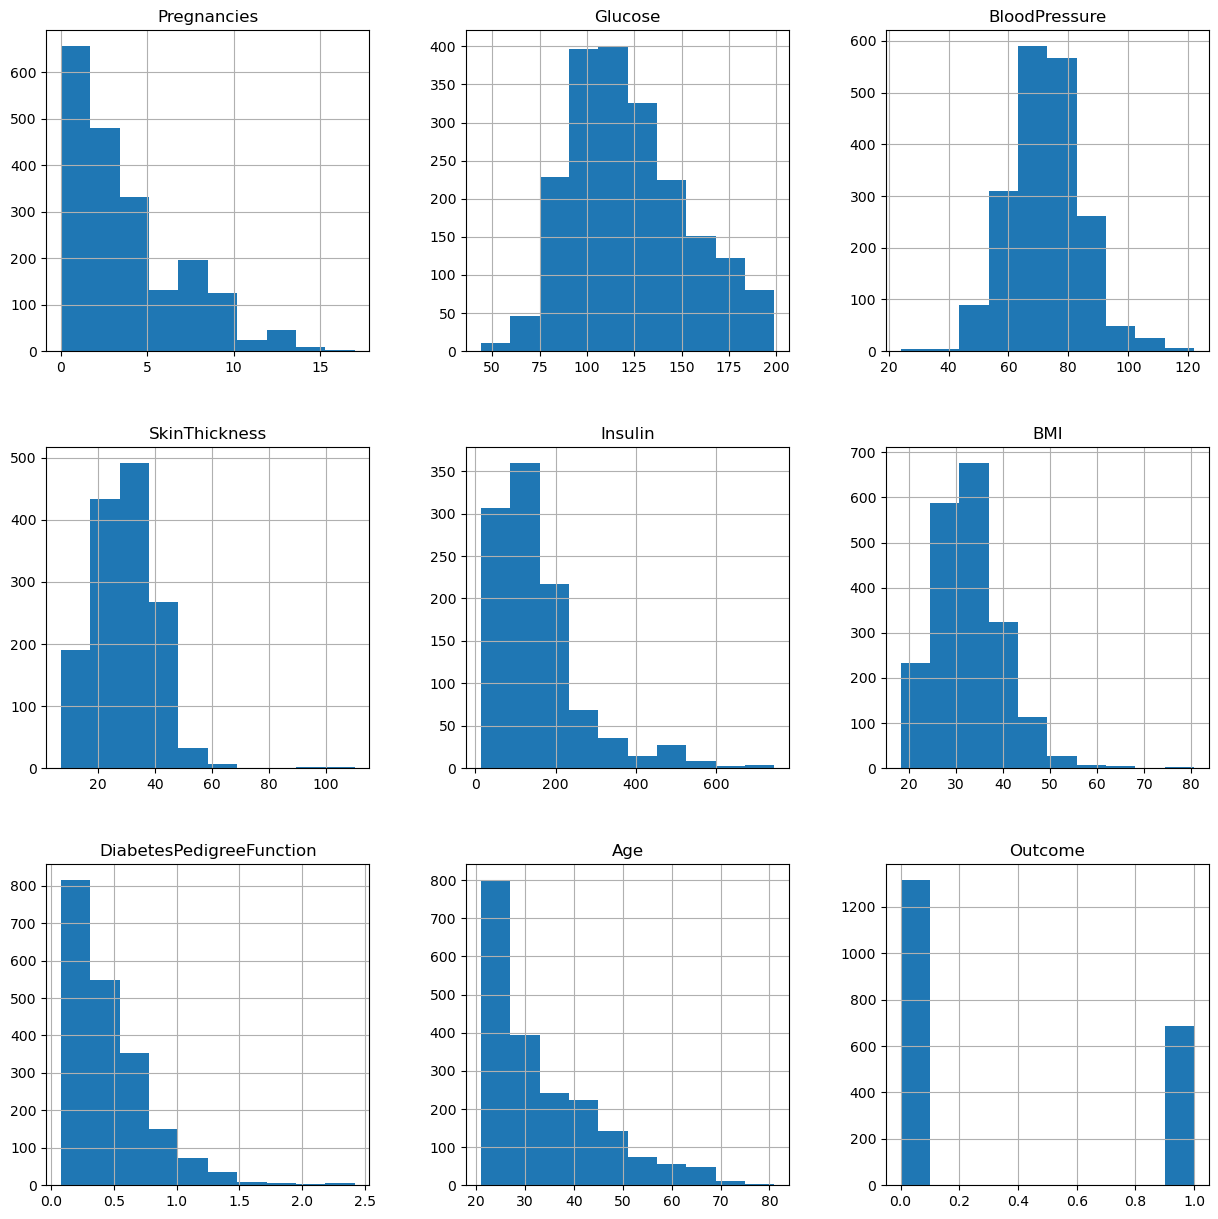

In [12]:
#to fill these NAnvalues the data distribution needs to understood 
#plotting Histrogram of data set before replacing NAn values
p=df_copy.hist(figsize=(15,15))


In [13]:
#Replacing NAN value with mean and median depending upon Distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)


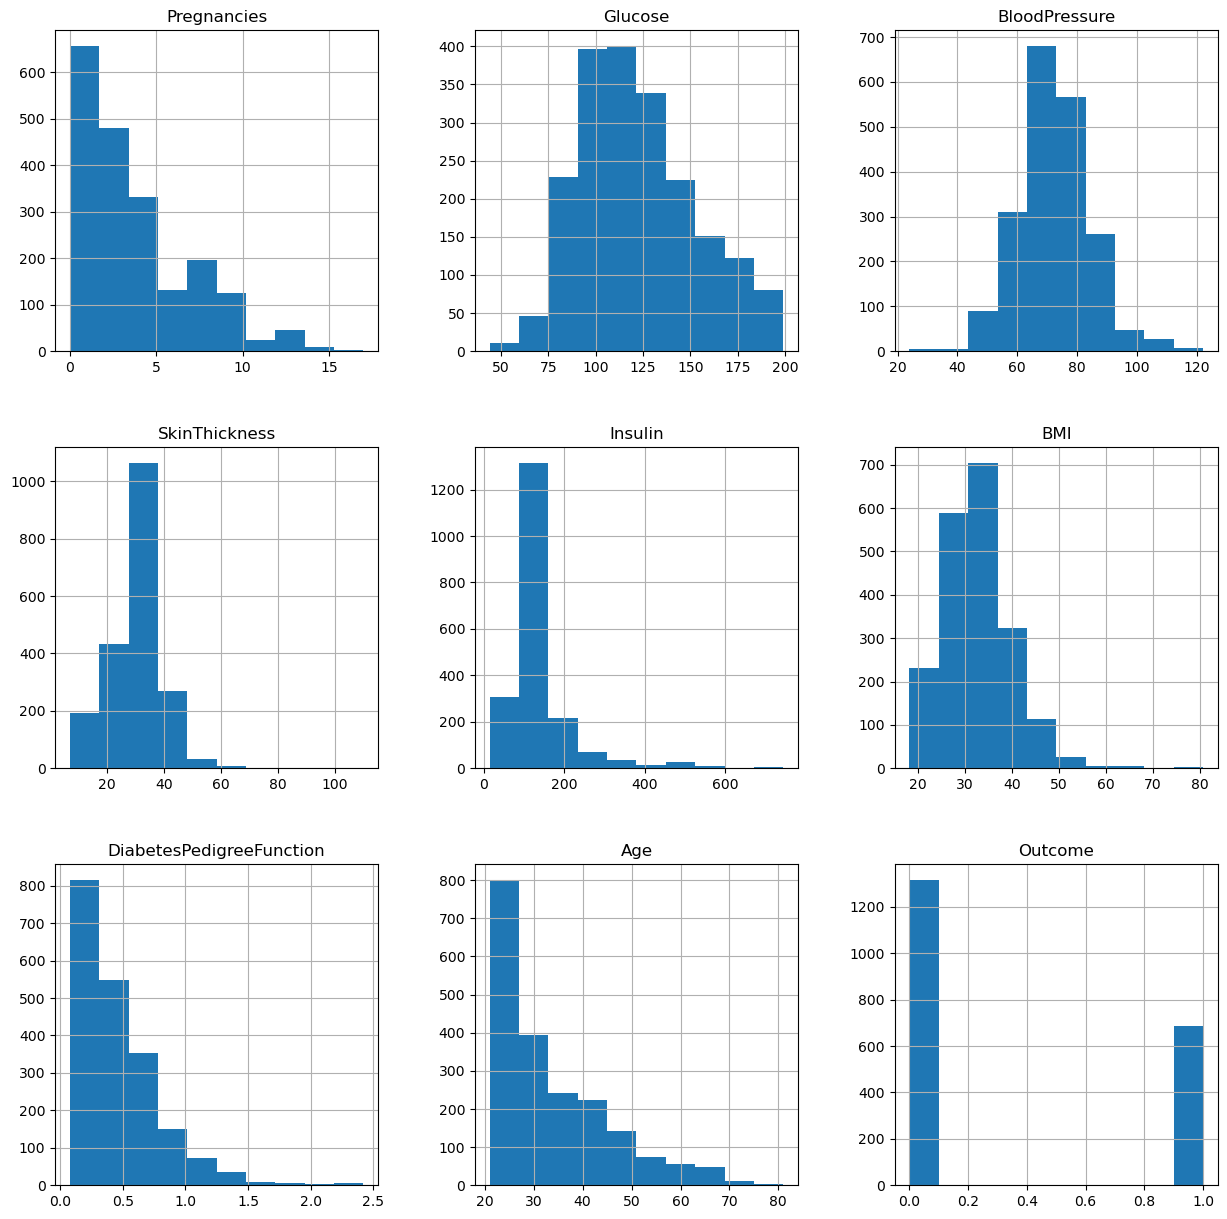

In [14]:
#plotting histrogram of data set after replacing NAN values
p=df_copy.hist(figsize=(15,15))

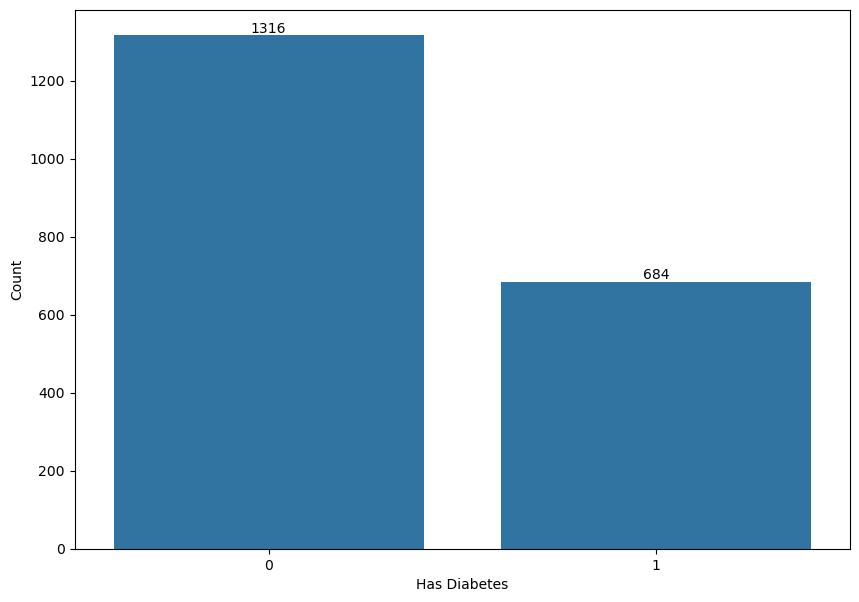

In [15]:
#plotting the outcome based on the number of the dataset entries
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Outcome',data=df_copy)

for bars in ax.containers:
    ax.bar_label(bars)
#Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

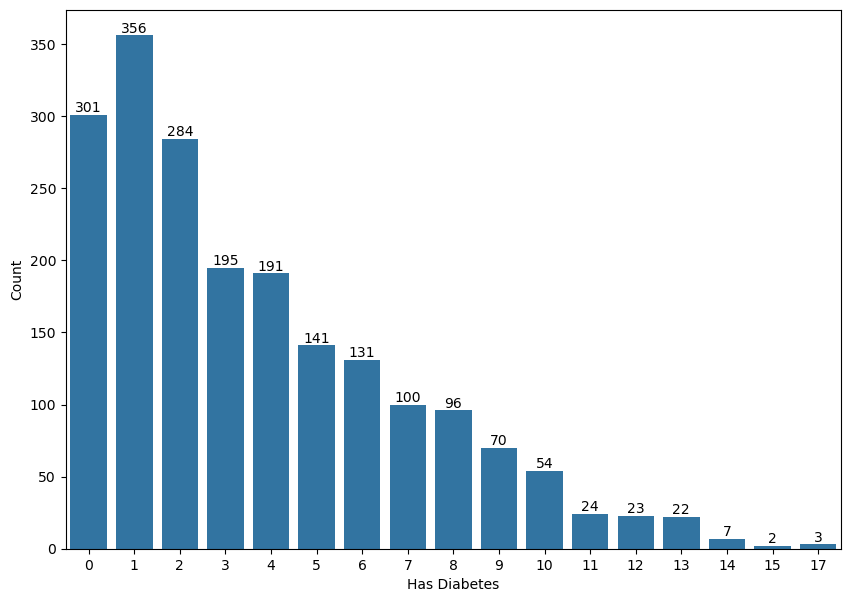

In [16]:
#plotting the outcome based on the number of the dataset entries
                
#                      13
#                 90
#             573
# Insulin                     956
# 28
#       0
# Age
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Pregnancies',data=df_copy)

for bars in ax.containers:
    ax.bar_label(bars)
#Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

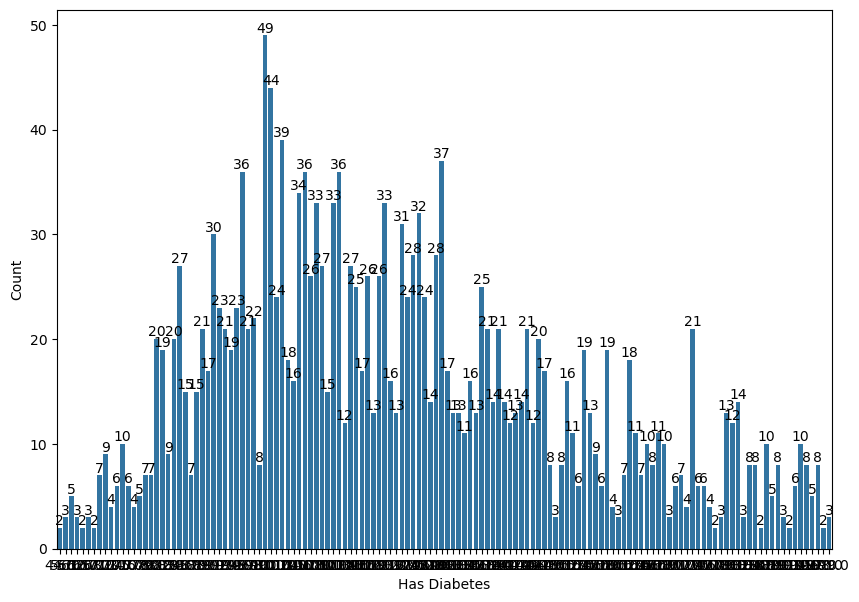

In [17]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Glucose',data=df_copy)

for bars in ax.containers:
    ax.bar_label(bars)
#Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

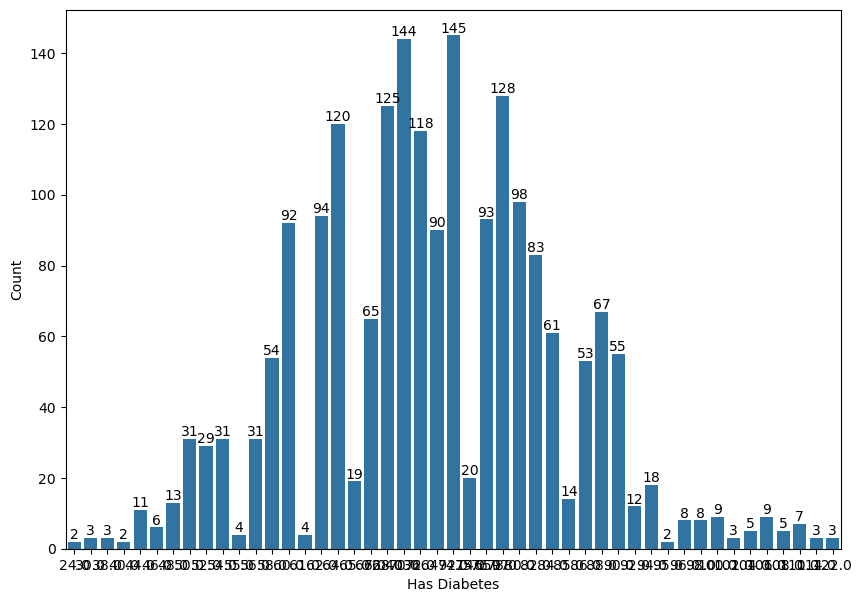

In [18]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='BloodPressure',data=df_copy)

for bars in ax.containers:
    ax.bar_label(bars)
#Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Insuline VS Outcome')

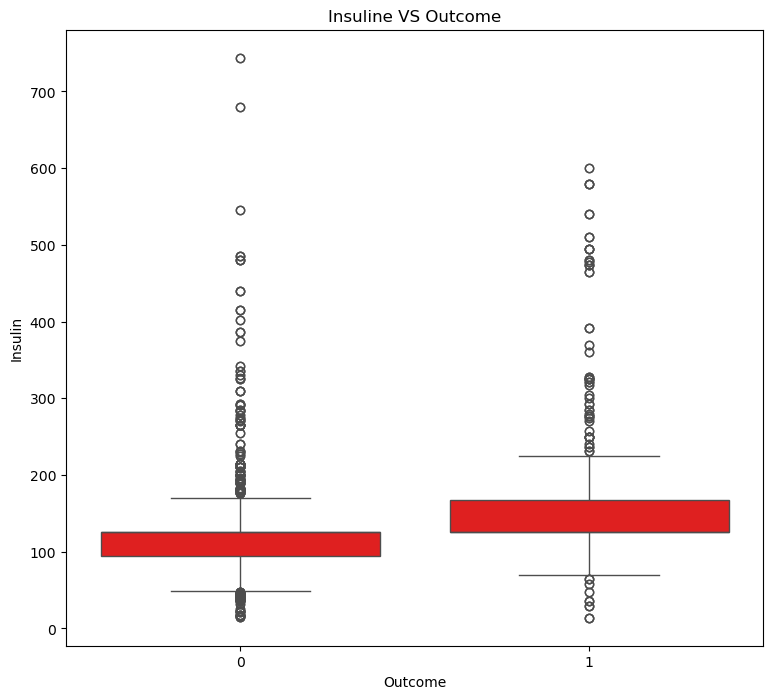

In [19]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="Insulin",color="red")
plt.title("Insuline VS Outcome")

Text(0.5, 1.0, 'Age VS Outcome')

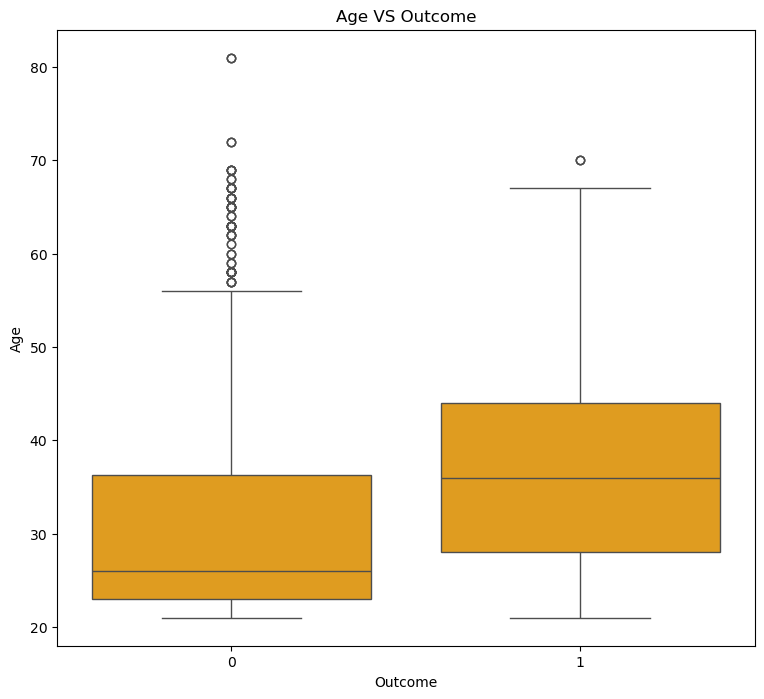

In [20]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="Age",color="orange")
plt.title("Age VS Outcome")

Text(0.5, 1.0, 'BloodPressure VS Outcome')

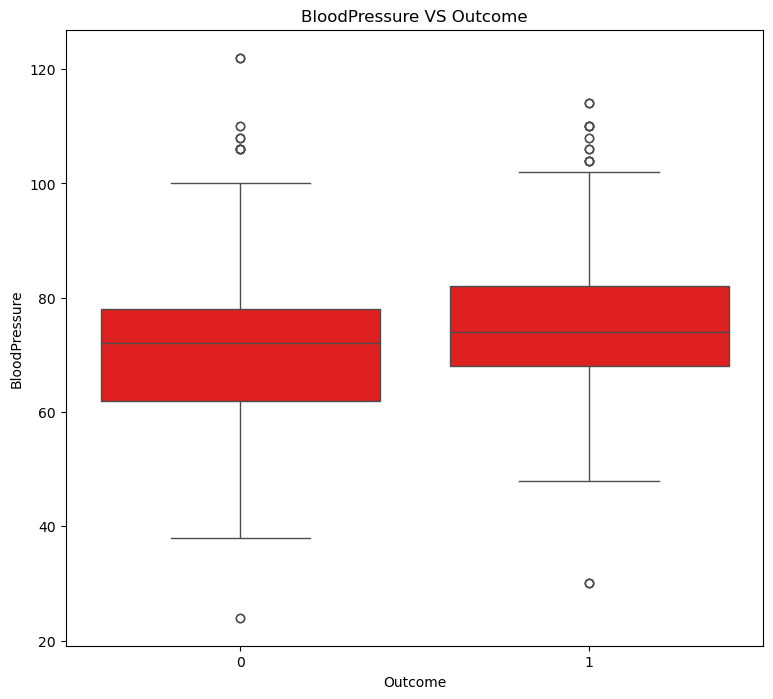

In [21]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="BloodPressure",color="red")
plt.title("BloodPressure VS Outcome")

Text(0.5, 1.0, 'Glucose VS Outcome')

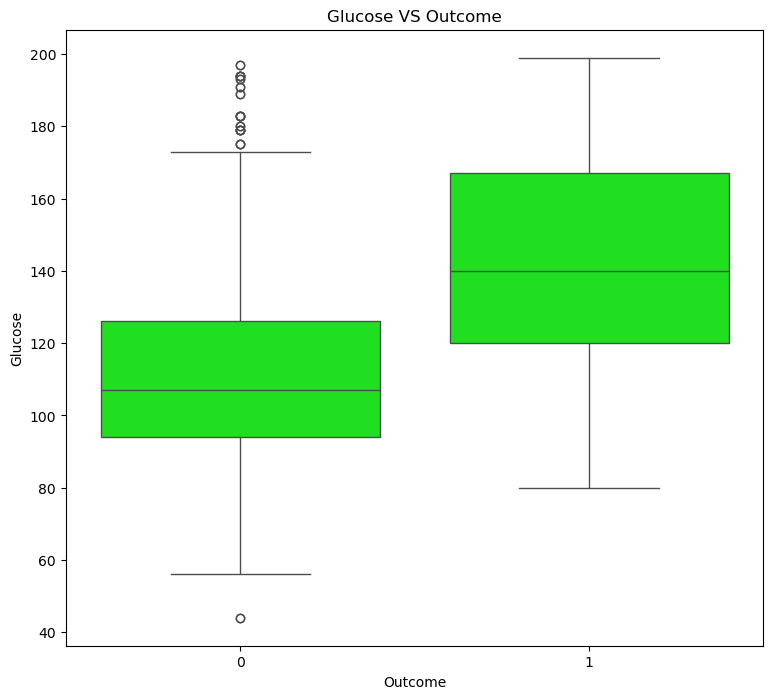

In [22]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="Glucose",color="lime")
plt.title("Glucose VS Outcome")

Text(0.5, 1.0, ' SkinThickness   VS Outcome')

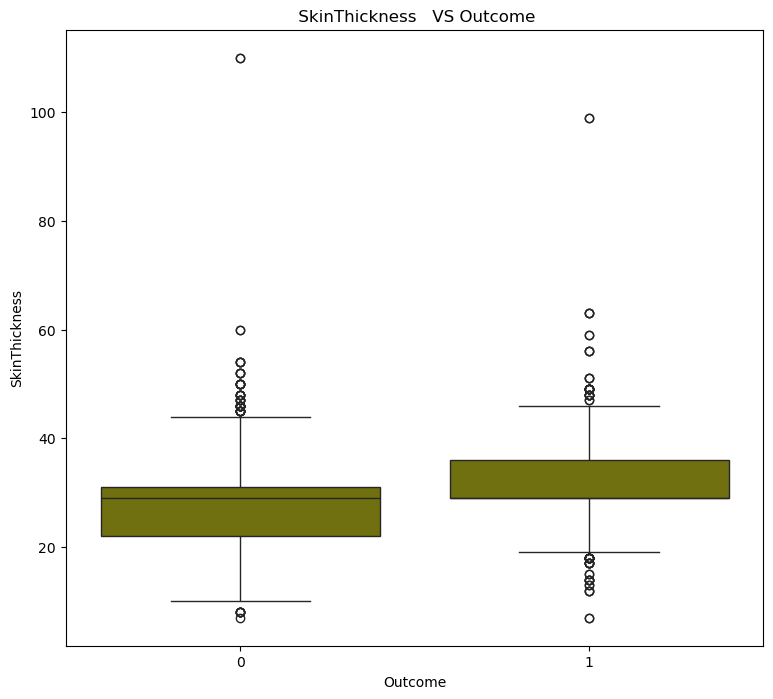

In [23]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="SkinThickness",color="olive")
plt.title(" SkinThickness   VS Outcome")

Text(0.5, 1.0, ' BMI   VS Outcome')

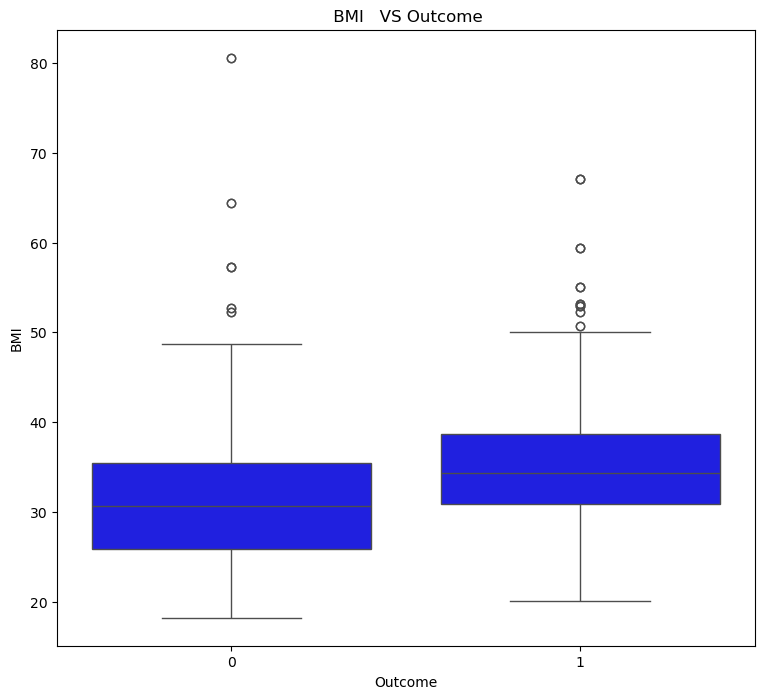

In [24]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="BMI",color="blue")
plt.title(" BMI   VS Outcome")

Text(0.5, 1.0, ' DiabetesPedigreeFunction  VS Outcome')

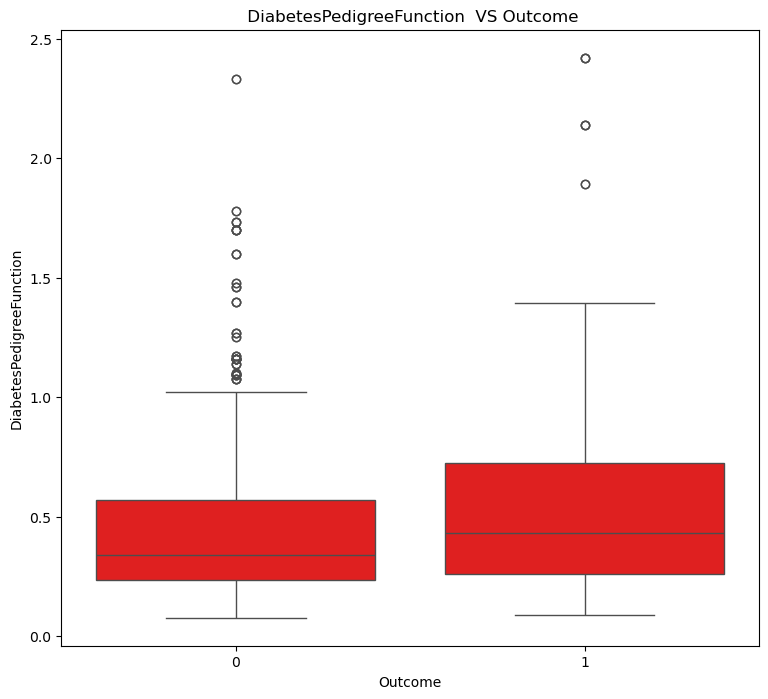

In [25]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x="Outcome",y="DiabetesPedigreeFunction",color="red")
plt.title(" DiabetesPedigreeFunction  VS Outcome")

In [26]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [27]:
#Model Buliding'
from sklearn.model_selection import train_test_split
X=df_copy.drop(columns='Outcome')
y=df_copy['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print('X_train size:{},X_test size{}'.format(X_train.shape,X_test.shape))

X_train size:(1600, 8),X_test size(400, 8)


In [28]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.0,55.0,29.7,0.370,33
1996,8,179.0,72.000000,42.0,130.0,32.7,0.719,36
1997,6,85.0,78.000000,29.0,126.0,31.2,0.382,42
1998,0,129.0,110.000000,46.0,130.0,67.1,0.319,26


In [29]:
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [30]:
#fature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [31]:
X_train

array([[ 2.54014777, -0.03778511,  0.47339657, ..., -0.8601368 ,
        -0.65077302,  2.50732972],
       [ 4.06518958,  1.32678364, -0.03517   , ...,  1.120727  ,
         1.04381097,  1.21199837],
       [-0.81494422, -0.65509002,  0.13435219, ...,  0.92814302,
        -0.5475188 ,  0.78022125],
       ...,
       [ 0.10008087, -0.88251815, -0.71325877, ..., -0.10355688,
        -0.94838813, -0.16968841],
       [ 2.23513941, -1.20741547,  0.13435219, ..., -0.36492085,
        -0.52626057,  0.17573329],
       [ 0.40508923,  0.44956087,  0.81244096, ..., -0.04853288,
         0.50628164,  3.11181769]])

In [32]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [33]:
#Initialize the dision tree Classifier
model_dt=DecisionTreeClassifier(random_state=42)
#Train the model
model_dt.fit(X_train,y_train)
#Make Predictions
y_pred_dt=model_dt.predict(X_test)
#Calculate perfromance metrics
accuracy_dt=accuracy_score(y_test,y_pred_dt)
precision_dt=precision_score(y_test,y_pred_dt)
recall_dt=recall_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)
conf_matrix_dt=confusion_matrix(y_test,y_pred_dt)
class_report_dt=classification_report(y_test,y_pred_dt)
# Print the performance metrics
print("Decision Tree Metrics:")
print('Accuracy:',round(accuracy_dt,2))
print('Precision:',round(precision_dt,2))
print('Recall:',round(recall_dt,2))
print('F1-Score:',round(f1_dt,2))
print('Confusion Matrix:',conf_matrix_dt)
print('Classification:',class_report_dt)

Decision Tree Metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
Confusion Matrix: [[270   2]
 [  2 126]]
Classification:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       272
           1       0.98      0.98      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [34]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state=42)
#Train the model
model_rf.fit(X_train,y_train)
#Make Predictions
y_pred_rf=model_rf.predict(X_test)
#Calculate perfromance metrics
accuracy_rf=accuracy_score(y_test,y_pred_rf)
precision_rf=precision_score(y_test,y_pred_rf)
recall_rf=recall_score(y_test,y_pred_rf)
f1_rf=f1_score(y_test,y_pred_rf)
conf_matrix_rf=confusion_matrix(y_test,y_pred_rf)
class_report_rf=classification_report(y_test,y_pred_rf)
# Print the performance metrics
print("Random Forest Metrics:")
print('Accuracy:',round(accuracy_rf,2))
print('Precision:',round(precision_rf,2))
print('Recall:',round(recall_rf,2))
print('F1-Score:',round(f1_rf,2))
print('Confusion Matrix:',conf_matrix_rf)
print('Classification:',class_report_rf)


Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 0.98
F1-Score: 0.99
Confusion Matrix: [[272   0]
 [  2 126]]
Classification:               precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



In [35]:
from sklearn.svm import SVC
model_svm=SVC(random_state=42)
#Train the model
model_svm.fit(X_train,y_train)
#Make Predictions
y_pred_svm=model_svm.predict(X_test)
#Calculate perfromance metrics
accuracy_svm=accuracy_score(y_test,y_pred_svm)
precision_svm=precision_score(y_test,y_pred_svm)
recall_svm=recall_score(y_test,y_pred_svm)
f1_svm=f1_score(y_test,y_pred_svm)
conf_matrix_svm=confusion_matrix(y_test,y_pred_svm)
class_report_svm=classification_report(y_test,y_pred_svm)
# Print the performance metrics
print("Svm Metrics:")
print('Accuracy:',round(accuracy_svm,2))
print('Precision:',round(precision_svm,2))
print('Recall:',round(recall_svm,2))
print('F1-Score:',round(f1_svm,2))
print('Confusion Matrix:',conf_matrix_svm)
print('Classification:',class_report_svm)


Svm Metrics:
Accuracy: 0.84
Precision: 0.82
Recall: 0.66
F1-Score: 0.73
Confusion Matrix: [[253  19]
 [ 43  85]]
Classification:               precision    recall  f1-score   support

           0       0.85      0.93      0.89       272
           1       0.82      0.66      0.73       128

    accuracy                           0.84       400
   macro avg       0.84      0.80      0.81       400
weighted avg       0.84      0.84      0.84       400



In [36]:
#cross validation
from sklearn.model_selection import ShuffleSplit,cross_val_score

# Create and train the Random Forest model
model = DecisionTreeClassifier(random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=ssplit)
print(results)
print("/n Mean Cross validation Accuracy:",np.mean(results))


[0.94666667 0.955      0.97333333 0.94666667 0.95166667 0.965
 0.95833333 0.96333333 0.94       0.95666667]
/n Mean Cross validation Accuracy: 0.9556666666666667


In [37]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=ssplit)
print(results)
print("/n Mean Cross validation Accuracy:",np.mean(results))

[0.96666667 0.945      0.95166667 0.965      0.96833333 0.98833333
 0.95833333 0.95833333 0.97333333 0.97166667]
/n Mean Cross validation Accuracy: 0.9646666666666665


In [38]:
model = SVC(random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=ssplit)#perform cross_validation
print(results)
print("/n Mean Cross validation Accuracy:",np.mean(results))
print('Mean Accuracy:',np.mean(results))

[0.78       0.78833333 0.75333333 0.75833333 0.77333333 0.76666667
 0.77       0.78       0.78       0.77166667]
/n Mean Cross validation Accuracy: 0.7721666666666667
Mean Accuracy: 0.7721666666666667


In [39]:
#Predictions
import pickle
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

with open('diabetes_model.pkl','wb') as file:
    pickle.dump(model_dt,file)
print("Model saved successful")

Model saved successful


In [40]:
with open('sc.pkl','wb') as scaler_file:
    pickle.dump(sc,scaler_file)

<!-- import tkinter as tk
import pickle
import numpy as np

# Load the trained Random Forest model
with open('diabetes_model.pkl', 'rb') as model_file:#rb read in binary mode
    model = pickle.load(model_file)

# Load the scaler used during training
with open('sc.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Create Tkinter GUI
root = tk.Tk()
root.title("Diabetes Prediction")

# Function to get prediction from input fields
def get_prediction():
    # Get input values from entry fields
    Pregnancies = float(pregnancies_entry.get())
    Glucose = float(glucose_entry.get())
    BloodPressure = float(blood_pressure_entry.get())
    Skinthickness = float(skin_thickness_entry.get())
    Insulin = float(insulin_entry.get())
    Bmi = float(bmi_entry.get())
    Dpf = float(dpf_entry.get())
    Age = float(age_entry.get())

    # Create a numpy array with input values
    input_data = np.array([[Pregnancies,Glucose,BloodPressure,Skinthickness,Insulin,Bmi,Dpf,Age]])

    # Normalize the input data using the scaler
    input_data_scaled = scaler.transform(input_data)

    # Predict using the loaded model
    prediction = model.predict(input_data_scaled)

    # Display prediction result
    if prediction[0] == 1:
        result_label.config(text="Prediction: You have Diabetes.")
    else:
        result_label.config(text="Prediction: You do not have Diabetes.")

# Create labels and entry fields for input features
tk.Label(root, text="Pregnancies").grid(row=0, column=0)
tk.Label(root, text="Glucose").grid(row=1, column=0)
tk.Label(root, text="Blood Pressure").grid(row=2, column=0)
tk.Label(root, text="Skin Thickness").grid(row=3, column=0)
tk.Label(root, text="Insulin").grid(row=4, column=0)
tk.Label(root, text="BMI").grid(row=5, column=0)
tk.Label(root, text="DPF").grid(row=6, column=0)
tk.Label(root, text="Age").grid(row=7, column=0)

pregnancies_entry = tk.Entry(root)
glucose_entry = tk.Entry(root)
blood_pressure_entry = tk.Entry(root)
skin_thickness_entry = tk.Entry(root)
insulin_entry = tk.Entry(root)
bmi_entry = tk.Entry(root)
dpf_entry = tk.Entry(root)
age_entry = tk.Entry(root)

pregnancies_entry.grid(row=0, column=1)
glucose_entry.grid(row=1, column=1)
blood_pressure_entry.grid(row=2, column=1)
skin_thickness_entry.grid(row=3, column=1)
insulin_entry.grid(row=4, column=1)
bmi_entry.grid(row=5, column=1)
dpf_entry.grid(row=6, column=1)
age_entry.grid(row=7, column=1)

# Button to trigger prediction
predict_button = tk.Button(root, text="Predict", command=get_prediction)
predict_button.grid(row=8, columnspan=2)

# Label to display prediction result
result_label = tk.Label(root, text="")
result_label.grid(row=9, columnspan=2)

root.mainloop() -->

In [41]:
with open('sc.pkl','wb')as scaler_file:
  pickle.dump(sc,scaler_file)

In [ ]:
pip install --upgrade streamlit

In [ ]:
streamlit_code = """
import streamlit as st
import pickle
import numpy as np

# Load the trained RandomForest model and scaler
with open('diabetes_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('sc.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Create the web app
st.title('Diabetes Prediction App')

# Input fields
Pregnancies = st.number_input('Pregnancies', min_value=0.0, max_value=20.0, value=0.0, step=1.0)
Glucose = st.number_input('Glucose', min_value=0.0, max_value=400.0, value=30.0, step=1.0)
BloodPressure = st.number_input('BloodPressure', min_value=0.0, max_value=200.0, value=0.0, step=1.0)
SkinThickness = st.number_input('SkinThickness', min_value=0.0, max_value=200.0, value=0.0, step=1.0)
Insulin = st.number_input('Insulin', min_value=0.0, max_value=700.0, value=0.0, step=1.0)
DiabetesPedigreeFunction = st.number_input('DiabetesPedigreeFunction', min_value=0.0, max_value=2.0, value=0.0, step=0.01)
BMI = st.number_input('BMI', min_value=0.0, max_value=150.0, value=20.0, step=0.1)
Age = st.number_input('Age', min_value=15.0, max_value=100.0, value=25.0, step=1.0)

# Prepare the feature vector
features = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]], dtype=np.float64)

# Scale the features
features_scaled = scaler.transform(features)

# Predict Diabetes
predicted_Diabetes = model.predict(features_scaled)

prediction_label = "Yes" if predicted_Diabetes[0] == 1 else "No"
st.write(f'Predicted Diabetes: {prediction_label}')
"""

# Saving to file
import os

file_path = os.path.join(os.getcwd(), 'diabetesapp.py')

try:
    with open(file_path, 'w') as file:
        file.write(streamlit_code)
    print(f"File '{file_path}' has been saved.")
except Exception as e:
    print(f"Error saving file: {e}")